## Perceptron task description

 "A perceptron can be used when the data is linearly separable"
 
![Perceptron](percept.jpg)
 
#### Code must include:

- A set of points on a 2D plane [(x1,y1), (x2,y2, ..., (xn,yn)]
- The data separated into two categories by a line (i.e. y=2x)
- Plot the data and the line
- Create a perceptron function that takes the data as argument and based on the learning process finds the optimal weights that create the best line to separate the data.
- Plot the data and the expected line and the line obtained by the perceptron in every certain amount of iterations.
- Discuss: What is the optimal number of iterations? How many solutions can the perceptron find for this binary separation problem?

### Libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

### Datapoints

Some linearly separable data, randomly generated:

In [2]:
n = 20       # any arbitrary number of datapoints

x1 = np.random.uniform(0,1,n)
x2 = np.random.uniform(0,1,n)

matrix = np.empty((n,4))

for i in range(n):
    matrix[i][0] = 1
    matrix[i][1] = x1[i]
    matrix[i][2] = x2[i]
    
    if x1[i] + x2[i] >= 1 :        # this condiction allows for linearly separable datasets
        matrix[i][-1] = 1.0
    else :
        matrix[i][-1] = 0.0
    
matrix

array([[1.  , 0.67, 0.51, 1.  ],
       [1.  , 0.97, 0.5 , 1.  ],
       [1.  , 0.8 , 0.43, 1.  ],
       [1.  , 0.86, 0.06, 0.  ],
       [1.  , 0.13, 0.18, 0.  ],
       [1.  , 0.63, 0.7 , 1.  ],
       [1.  , 0.71, 0.41, 1.  ],
       [1.  , 0.6 , 0.53, 1.  ],
       [1.  , 0.03, 0.54, 0.  ],
       [1.  , 0.5 , 0.46, 0.  ],
       [1.  , 0.1 , 0.83, 0.  ],
       [1.  , 0.88, 0.68, 1.  ],
       [1.  , 0.52, 0.18, 0.  ],
       [1.  , 0.88, 0.32, 1.  ],
       [1.  , 0.09, 0.45, 0.  ],
       [1.  , 0.3 , 0.92, 1.  ],
       [1.  , 0.4 , 0.89, 1.  ],
       [1.  , 0.1 , 0.64, 0.  ],
       [1.  , 0.56, 0.35, 0.  ],
       [1.  , 0.96, 0.66, 1.  ]])

### Verify datapoint distribution is linearly separable

The condition can be verified by plotting the generated datapoints

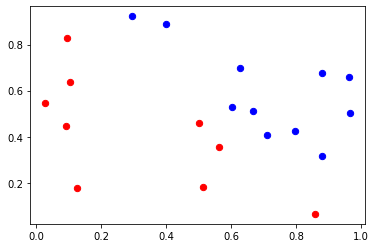

In [3]:
c1_data=[[],[]]
c0_data=[[],[]]

for i in range(len(matrix)):
    x1 = matrix[i][1]
    x2 = matrix[i][2]
    y  = matrix[i][-1]
    if y==1:
        c1_data[0].append(x1)
        c1_data[1].append(x2)
    else:
        c0_data[0].append(x1)
        c0_data[1].append(x2)

c0s = plt.scatter(c0_data[0],c0_data[1],s=40.0,c='r')
c1s = plt.scatter(c1_data[0],c1_data[1],s=40.0,c='b')

plt.show()

### Activation function

In [4]:
def activate(inputs, weights):
    activation=0.0
    for i,w in zip(inputs,weights):
        activation += i*w 
    return 1.0 if activation >= 0.0 else 0.0

### Accuracy function (how close are we?)

In [5]:
def accuracy(matrix,weights):
    num_correct = 0.0
    predictions = []
    for i in range(len(matrix)):
        classif = activate(matrix[i][:-1],weights) # get predicted classification
        predictions.append(classif)
        if classif == matrix[i][-1]: num_correct += 1.0 
    return num_correct/float(len(matrix))

### Plotting function

In [6]:
def plot(matrix, title):

    fig,ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

    axis_min=0.0
    axis_max=1.1
    y_res=0.001
    x_res=0.001
    ys=np.arange(axis_min,axis_max,y_res)
    xs=np.arange(axis_min,axis_max,x_res)
    zs=[]
    for cur_y in np.arange(axis_min,axis_max,y_res):
        for cur_x in np.arange(axis_min,axis_max,x_res):
            zs.append(activate([1.0,cur_x,cur_y],weights))
    xs,ys=np.meshgrid(xs,ys)
    zs=np.array(zs)
    zs = zs.reshape(xs.shape)
    cp=plt.contourf(xs,ys,zs,levels=[-1,-0.0001,0,1],colors=('b','r'),alpha=0.1)

    c1_data=[[],[]]
    c0_data=[[],[]]
    for i in range(len(matrix)):
        cur_x1 = matrix[i][1]
        cur_x2 = matrix[i][2]
        cur_y  = matrix[i][-1]
        if cur_y==1:
            c1_data[0].append(cur_x1)
            c1_data[1].append(cur_x2)
        else:
            c0_data[0].append(cur_x1)
            c0_data[1].append(cur_x2)

    plt.xticks(np.arange(0.0,1.1,0.1))
    plt.yticks(np.arange(0.0,1.1,0.1))
    plt.xlim(0,1.05)
    plt.ylim(0,1.05)

    c0s = plt.scatter(c0_data[0],c0_data[1],s=40.0,c='r',label='Class -1')
    c1s = plt.scatter(c1_data[0],c1_data[1],s=40.0,c='b',label='Class 1')

    plt.show()

### Setting up parameters

In [7]:
rate = 1.0               # an optimized learning rate provided by the author of the original code
weights = [0.2,  1.00,  -1.00] # initial weights, provided by the author of the original code

### Training and best fit function

In [8]:
def perceptron(matrix, weights = weights, rate = rate):   
    
    accuracies = []
    iterations = []
    errors = []
    
    iteration = 0
    
    cur_acc = accuracy(matrix, weights)    
    
    while cur_acc < 1.0:
        
        cur_acc = accuracy(matrix, weights)
        
        print("\n Iteration %d \nWeights: "%iteration, weights)
        print("Accuracy: ", cur_acc)

        if cur_acc==1.0: break 

        plot(matrix, title="Iteration %d"%iteration)
        
        sum_error = 0.0
        for i in range(len(matrix)):        
            prediction = activate(matrix[i][:-1],weights) # get predicted classificaion
            error      = matrix[i][-1]-prediction         # get error from real classification                  
            sum_error  += error**2             # get sum of square error SSE
            for j in range(len(weights)):                 # calculate new weight for each node
                weights[j] = weights[j]+(rate*error*matrix[i][j]) 
                             
        iteration = iteration + 1
        
        errors.append(sum_error)
        accuracies.append(cur_acc)
        iterations.append(iteration)
             
    plot(matrix, title="Iteration %d"%iteration)
   
    iteration = iteration + 1   
    errors.append(sum_error)
    accuracies.append(cur_acc)
    iterations.append(iteration)
    
    print('Final weights: ', weights) 
    print('SSE evolution: ', errors)
    print('Accuracy evolution: ', accuracies)
    print('Iterations: ', iterations)
    
    fig1 = plt.figure()
    plt.plot(iterations, accuracies, marker='o', linestyle='dashed')
    fig1.suptitle('Accuracy evolution', fontsize=12)
    plt.xlabel('Iteration', fontsize=11)
    plt.ylabel('Accuracy', fontsize=11)
    
    fig2 = plt.figure()
    plt.plot(iterations, errors, marker='o', linestyle='dashed')
    fig2.suptitle('Sum of Square Error evolution', fontsize=12)
    plt.xlabel('Iteration', fontsize=11)
    plt.ylabel('SE', fontsize=11)

### Test

We proceed to test the perceptron function


 Iteration 0 
Weights:  [0.2, 1.0, -1.0]
Accuracy:  0.65


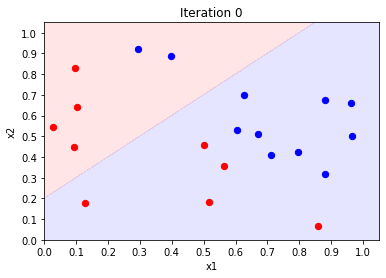


 Iteration 1 
Weights:  [-0.8, 1.3000798070700323, -0.13097316949262616]
Accuracy:  0.75


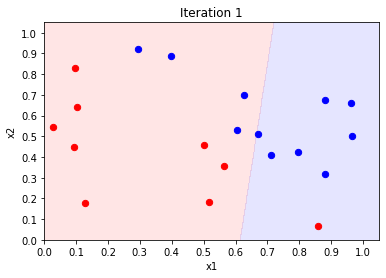


 Iteration 2 
Weights:  [-0.8, 1.6616643151778403, 1.0918549202413415]
Accuracy:  0.7


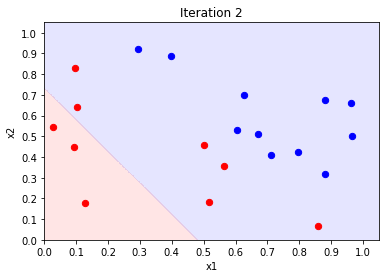


 Iteration 3 
Weights:  [-1.7999999999999998, 2.7836759389099797, 1.6371046681024417]
Accuracy:  0.85


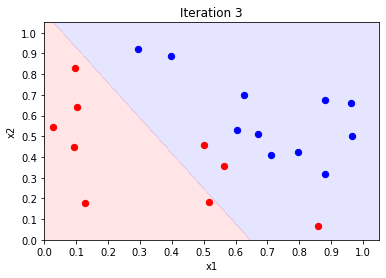


 Iteration 4 
Weights:  [-2.8, 2.3712104709109405, 1.7740691035456289]
Accuracy:  0.6


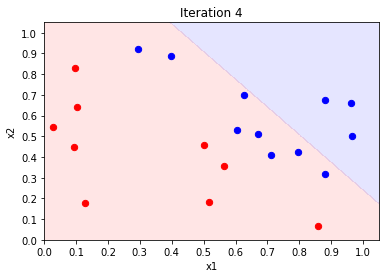


 Iteration 5 
Weights:  [-2.8, 3.17158838999571, 1.8473122010896208]
Accuracy:  0.9


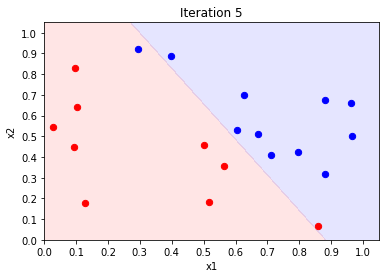


 Iteration 6 
Weights:  [-2.8, 2.941776004021392, 2.481898594031669]
Accuracy:  1.0


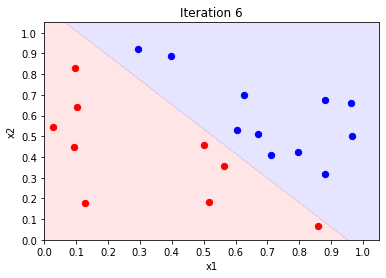

Final weights:  [-2.8, 2.941776004021392, 2.481898594031669]
SSE evolution:  [7.0, 6.0, 9.0, 5.0, 6.0, 2.0, 2.0]
Accuracy evolution:  [0.65, 0.75, 0.7, 0.85, 0.6, 0.9, 1.0]
Iterations:  [1, 2, 3, 4, 5, 6, 7]


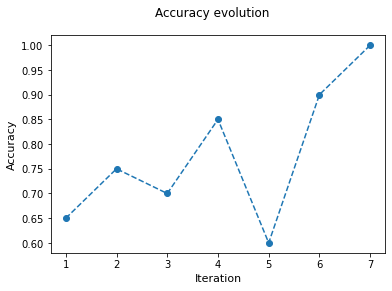

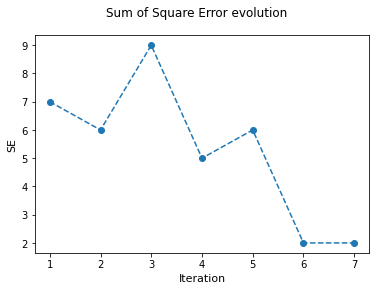

In [9]:
perceptron(matrix)